In [45]:
import time
import requests
from bs4 import BeautifulSoup
import datetime as dt
import pandas as pd
from multiprocessing import Pool
import numpy as np
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

tqdm.pandas()
headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }


In [2]:
nifty50 = ["ADANI ENTERPRISES","ADANI PORTS & SEZ","APOLLO HOSPITALS","ASIAN PAINTS",
           "AXIS BANK","BAJAJ AUTO","BAJAJ FINANCE","BAJAJ FINSERV","BHARTI AIRTEL",
           "BPCL","CIPLA","COAL INDIA","DIVIS LABORATORIES","DR. REDDYS LAB","EICHER MOTORS",
           "GRASIM","HCL TECHNOLOGIES","HDFC BANK","HDFC LIFE INSURANCE","HERO MOTOCORP",
           "HINDALCO","HUL","ICICI BANK","INDUSIND BANK","INFOSYS","IOC","ITC","JSW STEEL",
           "KOTAK MAHINDRA BANK","L&T","LTIMINDTREE","M&M","MARUTI SUZUKI","NESTLE","NTPC",
           "ONGC","POWER GRID","RELIANCE IND.","SBI","SBI LIFE INSURANCE","SUN PHARMA","TATA CONSUMER",
           "TATA MOTORS","TATA STEEL","TCS","TECH MAHINDRA","TITAN","ULTRATECH CEMENT","UPL","WIPRO"]

In [3]:
len(nifty50)

50

In [33]:
result = []
for i in tqdm(nifty50):
    url = 'https://www.google.com/search?q={}+stock finology'.format(i)
    req = requests.get(url, headers)
    soup = BeautifulSoup(req.content, 'html.parser')
    rating_span = soup.find('span', class_='r0bn4c rQMQod tP9Zud')
    rating_value = rating_span.get_text(strip=True).split('(')[0] if rating_span else np.nan

    ticker_div = soup.find('div', class_='BNeawe UPmit AP7Wnd lRVwie')
    ticker = ticker_div.get_text(strip=True).split("› ")[-1] if ticker_div else None
    result.append([i, ticker, rating_value])
#     print("Ticker:", ticker)
#     print("Rating:", rating_value)

  0%|          | 0/50 [00:00<?, ?it/s]

In [36]:
df_rating=pd.DataFrame(data=result, columns=["company","Code","rating"])
# df_rating

In [35]:
df_rating.sort_values(["rating"],ascending=False)

,company,Code,rating
28,KOTAK MAHINDRA BANK,KOTAKBANK,5.0
0,ADANI ENTERPRISES,ADANIENT,4.0
17,HDFC BANK,HDFCBANK,4.0
48,UPL,UPL,4.0
46,TITAN,TITAN,4.0
44,TCS,TCS,4.0
43,TATA STEEL,TATASTEEL,4.0
38,SBI,SBIN,4.0
35,ONGC,ONGC,4.0
33,NESTLE,NESTLEIND,4.0


### Selecting only companies with rating>=4

In [39]:
df_rating = df_rating[df_rating.rating.astype(float)>=4.0]

In [40]:
df_rating

,company,Code,rating
0,ADANI ENTERPRISES,ADANIENT,4.0
3,ASIAN PAINTS,ASIANPAINT,4.0
6,BAJAJ FINANCE,BAJFINANCE,4.0
8,BHARTI AIRTEL,telecommunication-service-provider,4.0
11,COAL INDIA,COALINDIA,4.0
12,DIVIS LABORATORIES,DIVISLAB,4.0
14,EICHER MOTORS,EICHERMOT,4.0
16,HCL TECHNOLOGIES,HCLTECH,4.0
17,HDFC BANK,HDFCBANK,4.0
19,HERO MOTOCORP,automobile-two-three-wheelers,4.0


In [42]:
df_rating.company.values

array(['ADANI ENTERPRISES', 'ASIAN PAINTS', 'BAJAJ FINANCE',
       'BHARTI AIRTEL', 'COAL INDIA', 'DIVIS LABORATORIES',
       'EICHER MOTORS', 'HCL TECHNOLOGIES', 'HDFC BANK', 'HERO MOTOCORP',
       'HUL', 'ICICI BANK', 'INFOSYS', 'IOC', 'KOTAK MAHINDRA BANK',
       'LTIMINDTREE', 'NESTLE', 'ONGC', 'SBI', 'TATA STEEL', 'TCS',
       'TITAN', 'UPL', 'WIPRO'], dtype=object)

In [43]:
stock = ["ADANIENT.NS","ASIANPAINT.NS","BAJFINANCE.NS", "COALINDIA.NS","BHARTIARTL.NS",
         "DIVISLAB.NS","EICHERMOT.NS","HCLTECH.NS","HDFCBANK.NS","HEROMOTOCO.NS",
         "HINDUNILVR.NS","ICICIBANK.NS","INFY.NS","IOC.NS", "KOTAKBANK.NS", "LTIM.NS",
        "NESTLEIND.NS", "ONGC.NS", "SBIN.NS","TATASTEEL.NS","TCS.NS","TITAN.NS","UPL.NS","WIPRO.NS"]

In [63]:
start = "2021-01-01"
end = "2023-08-05"
tickers = yf.Tickers(stock)
df = tickers.history(start = start, end = end)["Close"]

[*********************100%***********************]  24 of 24 completed


In [64]:
ticker = yf.Ticker("0P0000XVTL.BO")
df2 = ticker.history(start = start, end = end)["Close"]


In [65]:
df = df.resample('W').apply(lambda x : x.iloc[-1])
df2 = df2.resample('W').apply(lambda x : x.iloc[-1])

In [66]:
df2.index = df2.index.strftime('%Y-%m-%d')
df.index = df.index.strftime('%Y-%m-%d')

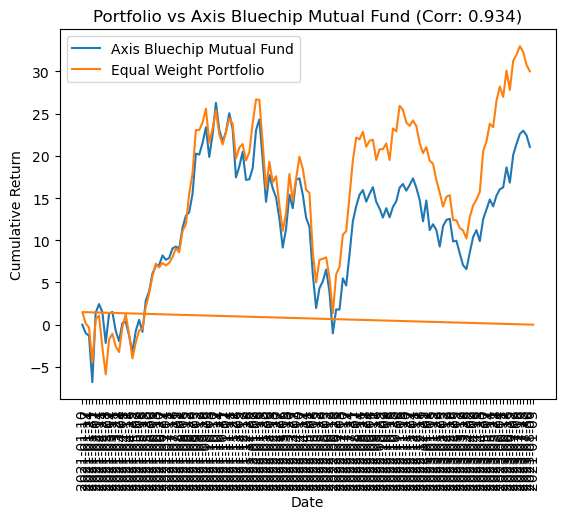

In [70]:
portfolio_ret = 100*((1+df.sum(1).pct_change()).cumprod() - 1).fillna(0)
nifty50_ret = 100*((1+df2.pct_change()).cumprod() - 1).fillna(0)

plt.plot(nifty50_ret, label = "Axis Bluechip Mutual Fund")
plt.plot(portfolio_ret, label="Equal Weight Portfolio")

plt.title('Portfolio vs Axis Bluechip Mutual Fund (Corr: '+str(round(nifty50_ret.corr(portfolio_ret),3))+")")
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=90)
plt.legend()
# plt.grid(True)
plt.show()

In [71]:
print("Sharpe Portfolio:", np.sqrt(250)*round(df.sum(1).pct_change().mean()/df.sum(1).pct_change().std(),3))
print("Sharpe Nifty50:", np.sqrt(250)*round(df2.pct_change().mean()/df2.pct_change().std(),3))

Sharpe Portfolio: 1.6285729949867152
Sharpe Nifty50: 1.217476899164826
